In [11]:
!pip install openml


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/158.0 kB ? eta -:--:--
   -- ------------------------------------- 10.2/158.0 kB ? eta -:--:--
   ------- ------------------------------- 30.7/158.0 kB 435.7 kB/s eta 0:00:01
   ---------- ---------------------------- 41.0/158.0 kB 245.8 kB/s eta 0:00:01
   --------------- ----------------------- 61.4/158.0 kB 328.2 kB/s eta 0:00:01
   -------------------- ------------------ 81.9/158.0 kB 416.7 kB/s eta 0:00:01
   -------------------- ------------------ 81.9/158.0 kB 416.7 kB/s eta 0:00:01
   ------------------------------------ - 153.6/158.0 kB 482.7 kB/s eta 0:00:01
   -------------------------------------- 158.0/158.0 kB 450.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/93.9 kB ? eta -:--:--
   ------------- -------------------------- 30.7/93.9 kB 1.3 MB/s eta 0:00:01
   -------------------------- ------------- 61.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm


#Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

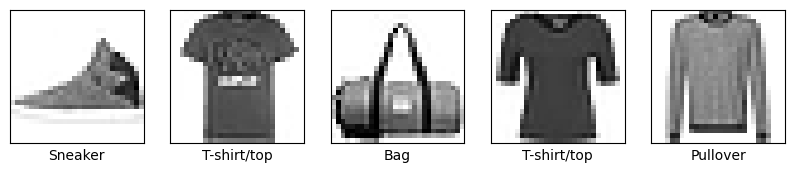

In [15]:
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

In [26]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Take a 10% stratified subsample to speed up experimentation
# Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(Xs,ys, stratify=ys, random_state=0)


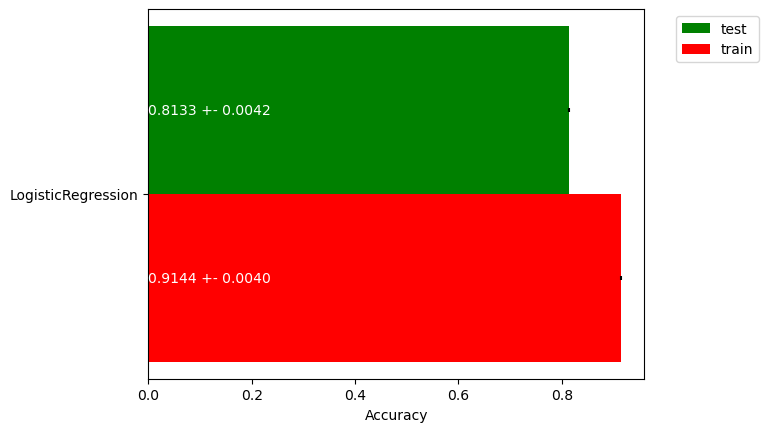

In [22]:
def evaluate_learners(classifiers, X, y):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data. 
    
    Given a list of classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
     - a list with the scores obtained on the training samples for each classifier,
     - a list with the test scores obtained on the test samples for each classifier.
     The order of scores should match the order in which the classifiers were originally provided. E.g.:     
     [Classifier1 train scores, ..., ClassifierN train scores], [Classifier1 test scores, ..., ClassifierN test scores]
    """
    # Evaluate with 3-fold cross-validation.
    xvals = [cross_validate(clf, X, y, return_train_score= True, n_jobs=-1) for clf in classifiers]
    train_scores = [x['train_score'] for x in xvals]
    test_scores = [x['test_score'] for x in xvals]
    return train_scores, test_scores


classifiers = [LogisticRegression()]
train_scores, test_scores = evaluate_learners(classifiers, Xs, ys)


fig, ax = plt.subplots()
width=0.3
ax.barh(np.arange(len(train_scores)), np.mean(test_scores, axis=1), width,
        yerr= np.std(test_scores, axis=1), color='green', label='test')
ax.barh(np.arange(len(train_scores))-width, np.mean(train_scores, axis=1), width,
        yerr= np.std(train_scores, axis=1), color='red', label='train')
for i, te, tr in zip(np.arange(len(train_scores)),test_scores,train_scores):
    ax.text(0, i, "{:.4f} +- {:.4f}".format(np.mean(te),np.std(te)), color='white', va='center')
    ax.text(0, i-width, "{:.4f} +- {:.4f}".format(np.mean(tr),np.std(tr)), color='white', va='center')
ax.set(yticks=np.arange(len(train_scores))-width/2, yticklabels=[c.__class__.__name__ for c in classifiers])
ax.set_xlabel('Accuracy')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

C:\Users\IT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


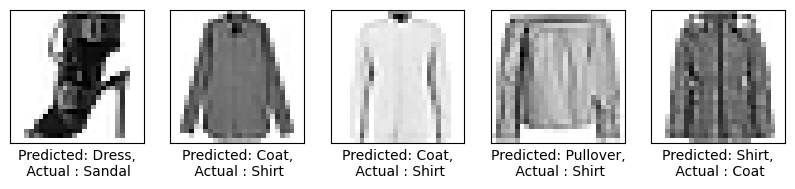

In [28]:
# model implementation:
model = LogisticRegression(C=1e-7).fit(X_train,y_train)
y_pred = model.predict(X_test)
misclassified_samples = np.nonzero(y_pred != list(y_test))[0]



# Visualize the (first five) misclassifications, together with the predicted and actual class
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for nr, i in enumerate(misclassified_samples[:5]):
    axes[nr].imshow(X_test.values[i].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (fmnist_classes[int(y_pred[i])],fmnist_classes[int(y_test.values[i])]))
    axes[nr].set_xticks(()), axes[nr].set_yticks(())

plt.show();

C:\Users\IT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


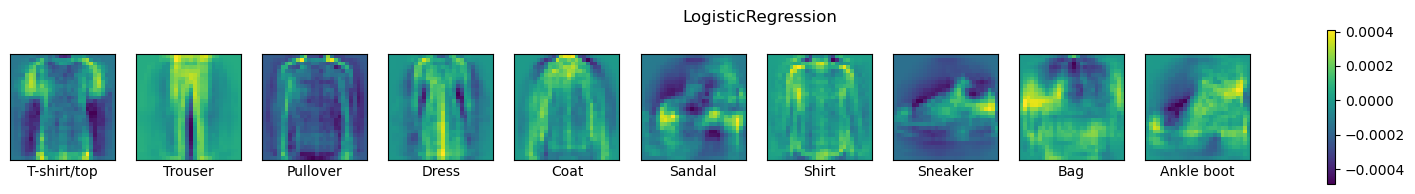

In [30]:
def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())


plot_coefficients(LogisticRegression(C=1e-7).fit(X_train,y_train))